In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MIP/models/obj/cifar100

/content/drive/MyDrive/MIP/models/obj/cifar100


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras import regularizers
from keras.optimizers import Adam, SGD
import pickle
from PIL import Image
from IPython.display import Image 
%matplotlib inline

In [ ]:
os.listdir()

['data.zip', 'Transfer100.ipynb', 'data']

In [ ]:
!unzip 'data.zip'

Streaming output truncated to the last 5000 lines.
 extracting: data/train/train/0010.png  
 extracting: data/train/train/0011.png  
 extracting: data/train/train/0012.png  
 extracting: data/train/train/0013.png  
 extracting: data/train/train/0014.png  
 extracting: data/train/train/0015.png  
 extracting: data/train/train/0016.png  
 extracting: data/train/train/0017.png  
 extracting: data/train/train/0018.png  
 extracting: data/train/train/0019.png  
 extracting: data/train/train/0020.png  
 extracting: data/train/train/0021.png  
 extracting: data/train/train/0022.png  
 extracting: data/train/train/0023.png  
 extracting: data/train/train/0024.png  
 extracting: data/train/train/0025.png  
 extracting: data/train/train/0026.png  
 extracting: data/train/train/0027.png  
 extracting: data/train/train/0028.png  
 extracting: data/train/train/0029.png  
 extracting: data/train/train/0030.png  
 extracting: data/train/train/0031.png  
 extracting: data/train/train/0032.png  
 extra

In [ ]:
os.listdir()

['data.zip', 'Transfer100.ipynb', 'data']

In [ ]:
for i in os.listdir('data/test'):
  print(i, len(os.listdir(f'data/test/{i}')))

In [ ]:
classes = {}
for i in os.listdir('./data/train'):
    classes[i] = len(os.listdir(f'./data/train/{i}'))

In [ ]:
len(classes)

100

<BarContainer object of 100 artists>

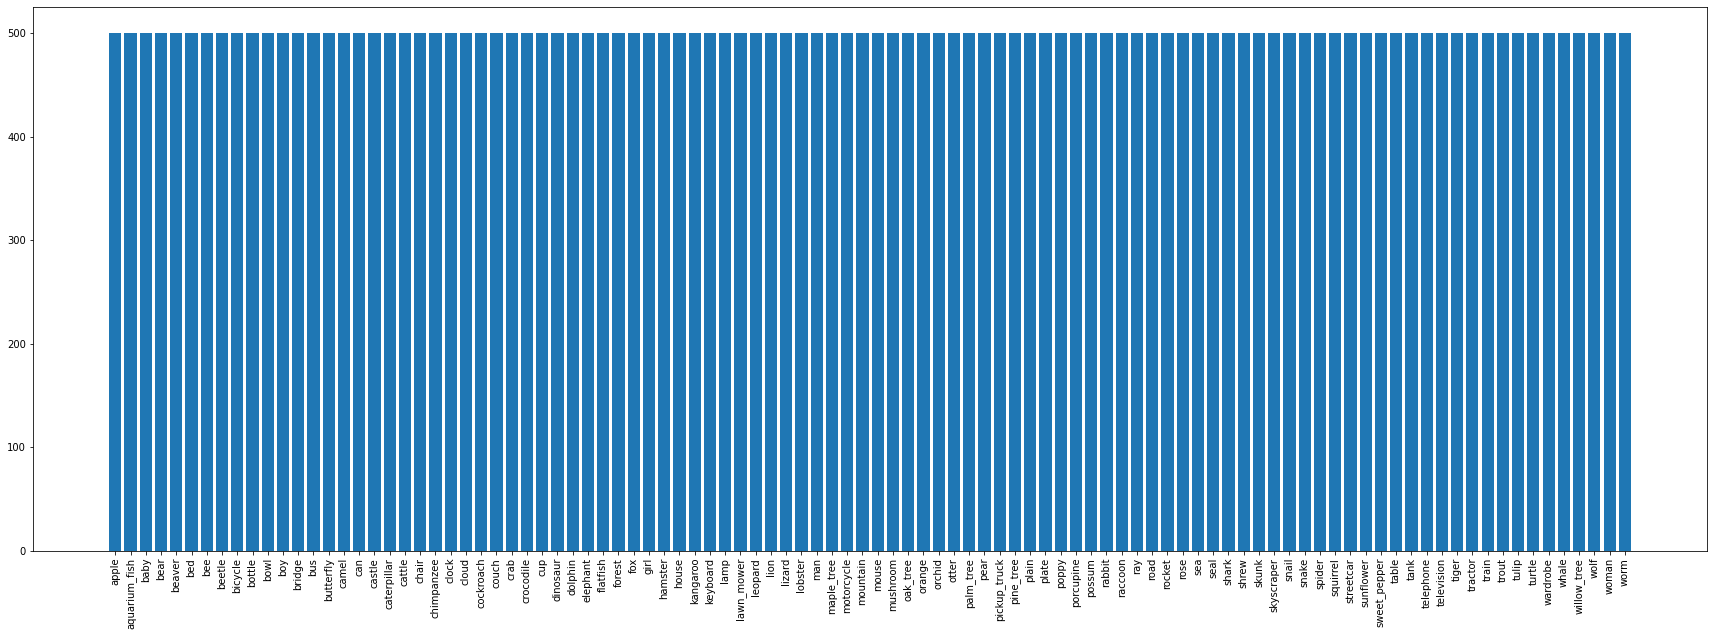

In [ ]:
plt.figure(figsize = (30, 10))
plt.xticks(rotation=90)
plt.bar(list(classes.keys()), list(classes.values()))

# Inception Network


In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
    './data/train', 
    target_size = (32, 32),
    batch_size = 16,
    class_mode = 'categorical',
    classes = list(classes.keys())
)

val_generator = datagen.flow_from_directory(
    './data/test',
    target_size = (32, 32),
    batch_size = 16,
    class_mode = 'categorical',
    classes = list(classes.keys())
)

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.


In [ ]:
model = Sequential()
model.add(InceptionV3(weights = 'imagenet', include_top = False))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'softmax'))

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
x = model.fit(train_generator, epochs = 10, validation_data = val_generator)

Epoch 1/10


In [ ]:
plt.figure(figsize = (12, 6), dpi=80)
plt.subplot(1, 2, 1)
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.plot()

plt.subplot(1, 2, 2)
plt.plot(x.history['loss']) 
plt.plot(x.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.plot()
plt.show()

In [ ]:
model.save("inception_caltech.h5")

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('inception_caltech.tflite', 'wb') as f:
  f.write(tflite_model)

# TFlite model

In [ ]:
# !pip install tflite-model-maker
!pip install -q tflite-model-maker-nightly

     |████████████████████████████████| 583kB 19.5MB/s 
     |████████████████████████████████| 122kB 55.8MB/s 
     |████████████████████████████████| 133kB 53.0MB/s 
     |████████████████████████████████| 655kB 52.7MB/s 
     |████████████████████████████████| 5.5MB 51.8MB/s 
     |████████████████████████████████| 112kB 54.0MB/s 
     |████████████████████████████████| 454.8MB 36kB/s 
     |████████████████████████████████| 174kB 56.1MB/s 
     |████████████████████████████████| 849kB 51.7MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 1.2MB 47.2MB/s 
     |████████████████████████████████| 1.1MB 50.8MB/s 
     |████████████████████████████████| 645kB 52.0MB/s 
     |████████████████████████████████| 1.2MB 44.4MB/s 
     |████████████████████████████████| 6.0MB 39.9MB/s 
     |████████████████████████████████| 4.0MB 47.3MB/s 
     |████████████████████████████████| 4.0MB 44.4MB/s 
     |████████████████████████████████| 471kB 58.

In [ ]:
!pip install tensorflow==2.4

In [ ]:
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker import model_spec
import matplotlib.pyplot as plt

In [ ]:
train_data = DataLoader.from_folder("./data/train")
test_data = DataLoader.from_folder("./data/test")

In [ ]:
validation_data, test_data = test_data.split(0.5)

In [ ]:
model = image_classifier.create(train_data, model_spec = model_spec.get('mobilenet_v2'), batch_size = 64,
                                validation_data = validation_data, epochs = 100,
                                learning_rate = 0.001, dropout_rate = 0.2)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               128100    
Total params: 2,386,084
Trainable params: 128,100
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/100
781/781 [==============================] - 100s 124ms/step - loss: 4.2818 - accuracy: 0.1204 - val_loss: 2.6827 - val_accuracy: 0.4639
Epoch 2/100
781/781 [==============================] - 98s 126ms/step - loss: 2.6894 - accuracy: 0.4413 - val_loss: 2.3280 - val_accuracy: 0.5441
Epoch 3/100
781/781 [==============================] - 97s 125ms/step 

In [ ]:
loss, accuracy = model.evaluate(test_data)

79/79 [==============================] - 12s 68ms/step - loss: 2.0532 - accuracy: 0.6248


In [ ]:
model.export(export_dir='/content/drive/MyDrive/MIP/models/obj/cifar100', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/drive/MyDrive/MIP/models/obj/cifar100/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/MyDrive/MIP/models/obj/cifar100/labels.txt.


In [ ]:
model.export(export_dir='/content/drive/MyDrive/MIP/models/obj/cifar100')

INFO:tensorflow:Assets written to: /tmp/tmp77kkuaow/assets


INFO:tensorflow:Assets written to: /tmp/tmp77kkuaow/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp3zd0p6w1/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp3zd0p6w1/labels.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/MIP/models/obj/cifar100/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/MIP/models/obj/cifar100/model.tflite
